# Lecture 11 Mapping Shootings
- Name : vrutik gala
- Div : B

In [12]:
# Setup

import pandas as pd

In [13]:
# Importing Mass Shooting Data of 2016 in our notebook

shooting_df=pd.read_csv("Mass-Shooting-Data-2016.csv")
shooting_df

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628


In [14]:
shooting_df.head(10)

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418
6,30-Oct-16,New York (Manhattan),New York,4,0,40.748436,-73.985693
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944
8,30-Oct-16,San Antonio,Texas,5,0,29.424600,-98.495140
9,29-Oct-16,Dayton,Ohio,3,1,39.758948,-84.191607


In [15]:
# total injuries and total killed by state and city
total_injured_killed_df=shooting_df.groupby(["state","city"]).agg(injured=("injured","sum"),killed=("killed","sum"))
total_injured_killed_df

injured  killed
state         city                                
Alabama       Anniston                   4       0
              Auburn                     1       3
              Bessemer                   3       1
              Bessemer (Brighton)        6       1
              Birmingham                 4       1
...                                    ...     ...
Washington    Seattle                    3       2
              Tacoma                     5       0
              Woodland                   1       3
West Virginia Charleston                 3       1
Wisconsin     Milwaukee                  5       3

[194 rows x 2 columns]

In [16]:
# average injuries and average killed by state and city
avg_injured_killed_df=shooting_df.groupby(["state","city"]).agg(avg_injured=("injured","mean"),avg_killed=("killed","mean"))
avg_injured_killed_df


avg_injured  avg_killed
state         city                                        
Alabama       Anniston                     4.0         0.0
              Auburn                       1.0         3.0
              Bessemer                     3.0         1.0
              Bessemer (Brighton)          6.0         1.0
              Birmingham                   4.0         1.0
...                                        ...         ...
Washington    Seattle                      3.0         2.0
              Tacoma                       5.0         0.0
              Woodland                     1.0         3.0
West Virginia Charleston                   3.0         1.0
Wisconsin     Milwaukee                    2.5         1.5

[194 rows x 2 columns]

In [17]:
# Sort by killed column in descending order
total_injured_killed_df.sort_values("killed",ascending=False)

injured  killed
state      city                                 
Florida    Orlando                    77      55
Illinois   Chicago                    87      11
Texas      Houston                    31      10
California Los Angeles                36       8
Arizona    Glendale                    5       8
...                                  ...     ...
New York   New York (Manhattan)        8       0
           Elmira                      5       0
           Corona (Queens)             4       0
           Brooklyn                   24       0
Alabama    Anniston                    4       0

[194 rows x 2 columns]

In [18]:
# Sort by killed column in ascending order
total_injured_killed_df.sort_values("killed",ascending=True)

,,injured,killed
state,city,,
Alabama,Anniston,4,0
New Jersey,Willingboro,4,0
New York,Bronx,4,0
Florida,Miami Gardens,4,0
New York,Brooklyn,24,0
...,...,...,...
Arizona,Glendale,5,8
Ohio,Piketon,0,8
Texas,Houston,31,10


# Top 5 states in United States with most injuries

In [19]:
state_injuries_df=shooting_df.groupby(["state"]).agg(injuries=("injured","sum"))
top_5_state_injuries_df=state_injuries_df.sort_values("injuries",ascending=False).head(5)
top_5_state_injuries_df

,injuries
state,
Florida,169
California,155
Illinois,127
Texas,94
New York,57


# 2016 Mass Shootings Report

In [20]:
# Total injuries

total_injuries=shooting_df.injured.sum()
total_injuries

1311

In [21]:
# Total killed

total_killed=shooting_df.killed.sum()
total_killed

400

# Create and print a variable that says"In 2016, there were x injuries, and y people killed due to mass-shootings."

In [22]:
sentence = "In 2016, there were "+ str(total_injuries) + " injuries,and "+ str(total_killed) + " people killed due to mass-shootings."
sentence

'In 2016, there were 1311 injuries,and 400 people killed due to mass-shootings.'

# LECTURE 12 STARTS HERE

INDEX Z
-A CITY IS DANGEROUS IF PERSONS INVOLVED PER INCIDENT ARE MORE THAN 5

In [25]:
# Creating a column called persons involved in shooting_df

shooting_df["persons_involved"]=shooting_df["injured"]+shooting_df["killed"]

#Creating a city_df to know total people involved and total incidents per city

city_df=shooting_df.groupby(["state","city"]).agg(total_persons_involved=("persons_involved","sum"),
                                                  total_incidents=("city","count"))

# Creating a column to calculate total persons per incident

city_df["total_persons_per_incident"]=city_df["total_persons_involved"]/city_df["total_incidents"]

# creating our final z index dataframe

z_index_df=city_df.loc[city_df["total_persons_per_incident"]>=5].sort_values("total_persons_per_incident",ascending=False)

z_index_df

,,total_persons_involved,total_incidents,total_persons_per_incident
state,city,,,
Florida,Orlando,132,5,26.4
Kansas,Hesston,18,1,18.0
California,Bakersfield,15,1,15.0
Connecticut,Bridgeport,13,1,13.0
Florida,Fort Myers,25,2,12.5
...,...,...,...,...
Alabama,Birmingham,5,1,5.0
Maryland,District Heights (Forestville),5,1,5.0
Michigan,Berrien (county),5,1,5.0


# Hoz index
- Filter for incidents where atleast 1 person is killed
- sort in descending to see cities with maximum incidents in which atleast 1 person is killed

In [28]:
atleast_one_killed_df=shooting_df.loc[shooting_df["killed"]>=1]
atleast_one_killed_df

,date,city,state,injured,killed,lat,lng,persons_involved
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421,4
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628,6
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418,7
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944,6
9,29-Oct-16,Dayton,Ohio,3,1,39.758948,-84.191607,4
...,...,...,...,...,...,...,...,...
319,17-Jan-16,Ware Neck (Gloucester Courthouse),Virginia,3,1,37.402640,-76.458560,4
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589,5
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421,5
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628,4


In [29]:
# sort in descending to see cities with the maximum incidents in which atleast one person is killed
hoz_city_df=atleast_one_killed_df.groupby(["state","city"]).agg(total_incidents=("city","count"))
hoz_city_df.sort_values("total_incidents",ascending=False)

total_incidents
state      city                             
Illinois   Chicago                         8
Texas      Houston                         7
Florida    Miami                           4
California Los Angeles                     4
Florida    Orlando                         4
...                                      ...
Georgia    Jackson                         1
           Dekalb (county)                 1
           Decatur                         1
           Atlanta                         1
Maryland   District Heights                1

[128 rows x 1 columns]

# Kha index
- Find the average(aka the mean) person involved per incident
- List the cities that exceed the average persons involved per incident

In [32]:
# average persons involved per incident

average_persons_involved_per_incident=shooting_df.persons_involved.mean()
average_persons_involved_per_incident

5.264615384615385

In [36]:
city_df.loc[city_df["total_persons_per_incident"]>=average_persons_involved_per_incident]

total_persons_involved  \
state         city                                               
Alabama       Bessemer (Brighton)                            7   
Arizona       Glendale                                      13   
              Phoenix                                       15   
California    Bakersfield                                   15   
              Compton                                        9   
              Los Angeles                                   44   
Connecticut   Bridgeport                                    13   
Florida       Cape Coral                                     6   
              Fort Myers                                    25   
              Jacksonville                                  11   
              Orlando                                      132   
              Tampa                                         12   
Georgia       Appling                                        6   
              Athens                                         7   
Illinois      Rockford                                       6   
Kansas        Hesston                                       18   
Louisiana     Shreveport                                    12   
Maryland      Bethesda                                       6   
              Capitol Heights                                6   
Massachusetts Chelsea                                        7   
Michigan      Grand Rapids                                   9   
              Kalamazoo                                      8   
Mississippi   Jackson                                        6   
              Pass Christian                                 6   
Missouri      Kansas City                                    6   
New Jersey    Egg Harbor City                                6   
              Trenton                                       11   
New York      Newburgh                                       7   
              Rochester                                      8   
Ohio          Hamilton                                       8   
              Piketon                                        8   
Oklahoma      Wellston                                       6   
Pennsylvania  Pittsburgh (Wilkinsburg)                       8   
Tennessee     Clarksville                                    6   
Texas         Dallas                                        23   
              Edinburg                                       7   
              Fort Worth                                     7   
              Lubbock                                        6   
Virginia      Chesapeake                                     6   
              Roanoke                                       20   

                                        total_incidents  \
state         city                                        
Alabama       Bessemer (Brighton)                     1   
Arizona       Glendale                                2   
              Phoenix                                 2   
California    Bakersfield                             1   
              Compton                                 1   
              Los Angeles                             8   
Connecticut   Bridgeport                              1   
Florida       Cape Coral                              1   
              Fort Myers                              2   
              Jacksonville                            2   
              Orlando                                 5   
              Tampa                                   2   
Georgia       Appling                                 1   
              Athens                                  1   
Illinois      Rockford                                1   
Kansas        Hesston                                 1   
Louisiana     Shreveport                              2   
Maryland      Bethesda                                1   
              Capitol Heights                         1   
Massachusetts Chelsea       

# Data visualisation: Bar charts

### Make a barchart that shows me top 5 cities by killed

In [51]:
# Data Viz Setup
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
bar_chart_df=shooting_df.groupby(["state","city"]).agg(killed=("killed","sum"))
bar_chart_df=bar_chart_df.sort_values("killed",ascending=False).head(5).reset_index()
bar_chart_df

,state,city,killed
0,Florida,Orlando,55
1,Illinois,Chicago,11
2,Texas,Houston,10
3,California,Los Angeles,8
4,Arizona,Glendale,8


<AxesSubplot:xlabel='city', ylabel='killed'>

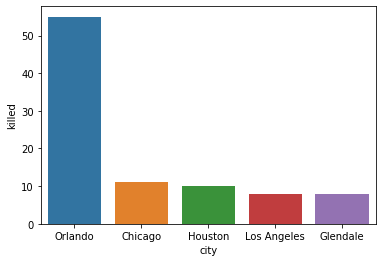

In [53]:
sns.barplot(x="city",y="killed",data=bar_chart_df)

# Make a bar chart with top 10 states with highest injured

In [58]:
bar_chart_df=shooting_df.groupby(["state"]).agg(injured=("injured","sum"))
bar_chart_df=bar_chart_df.sort_values("injured",ascending=False).head(10).reset_index()
bar_chart_df

,state,injured
0,Florida,169
1,California,155
2,Illinois,127
3,Texas,94
4,New York,57
5,Georgia,51
6,Alabama,46
7,Tennessee,43
8,Michigan,43
9,Louisiana,41


<AxesSubplot:xlabel='state', ylabel='injured'>

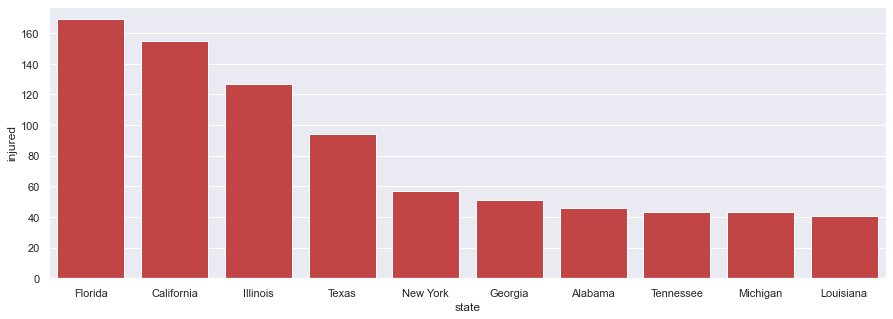

In [60]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x="state",y="injured", data= bar_chart_df, color= "#d63031")